<a href="https://colab.research.google.com/github/Vimalanandhan/Covid-19-Data-Analysis-/blob/main/Covid%2019%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'covid19-coronavirus-pandemic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2055575%2F3410294%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240826%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240826T073404Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5754abb475b0e2bfe5254e2a51d41b5147503247379a96072e7bab234ac554538e37730e2e2b0cd34c998ec08e3a4253a4da4bfb0e2702dba711d54ab4bb53641b28ad126518263d3ec40353df87a567f7497d782df5c3879958b17bcd4c19d4cbfb4e80892b02ddab0cf7f063a30ae03c4fdf04edd799eb761a1b1c55dbec9619fe1e495e70beaa549889b58c954de54c535eadcfec859da221724e1636c51ecdfc662cdbdd4461dac26af2343dcbd9f7541ff2315c9972ee3674c1f851d980ba6b8d180c1eba15c0b13e22893239a2b353a52794762e1966bd56e113f1d556e1da0a9e893c543f412235d37aa9fc3b7e6cbc4138e12cc3de8a376f85f9526b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-coronavirus-pandemic/COVID-19 Coronavirus.csv


In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/kaggle/input/covid19-coronavirus-pandemic/COVID-19 Coronavirus.csv')
# data is the name declared up above.

In [ ]:
data.head(10)
#Head will give me only first 10 values

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
5,Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333
6,Antigua and Barbuda,Antigua and Barbuda,ATG,99348,Latin America and the Caribbean,7493,135,75422,1359,1.801682
7,Argentina,Argentina,ARG,45921761,Latin America and the Caribbean,9041124,128065,196881,2789,1.416472
8,Armenia,Armenia,ARM,2972939,Asia,422574,8617,142140,2898,2.039169
9,Aruba,Aruba,ABW,107560,Latin America and the Caribbean,34051,212,316577,1971,0.622596


In [ ]:
data.describe()
#Decscribe will give us the Maximum, Minimum, Count, Mean, Standard Deivation and Count

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [ ]:
data.shape
#This gives the shape of the total

(225, 10)

In [ ]:
data.tail()
#This gives the last values, we can give in the brackets like what last values we needed eg:(10),(20)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120
224,Zimbabwe,Zimbabwe,ZWE,15241601,Africa,246525,5446,16174,357,2.209107


<Axes: >

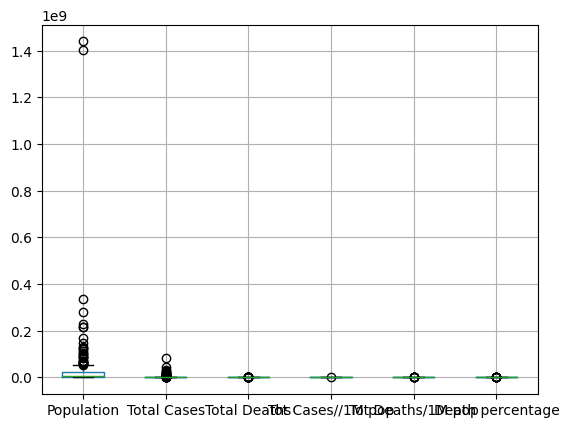

In [ ]:
data.boxplot()
#This will help us to do the box plot the table

array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Total Cases'}>],
       [<Axes: title={'center': 'Total Deaths'}>,
        <Axes: title={'center': 'Tot\xa0Cases//1M pop'}>],
       [<Axes: title={'center': 'Tot\xa0Deaths/1M pop'}>,
        <Axes: title={'center': 'Death percentage'}>]], dtype=object)

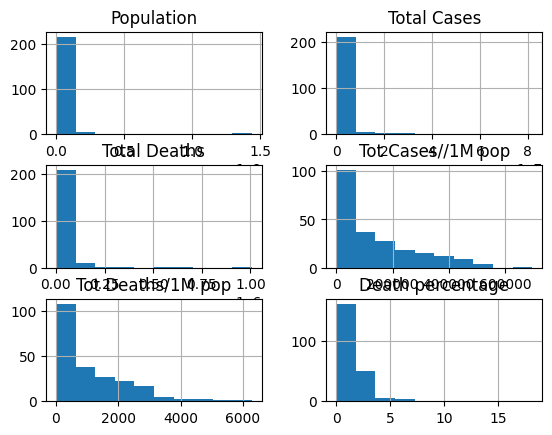

In [ ]:
data.hist()